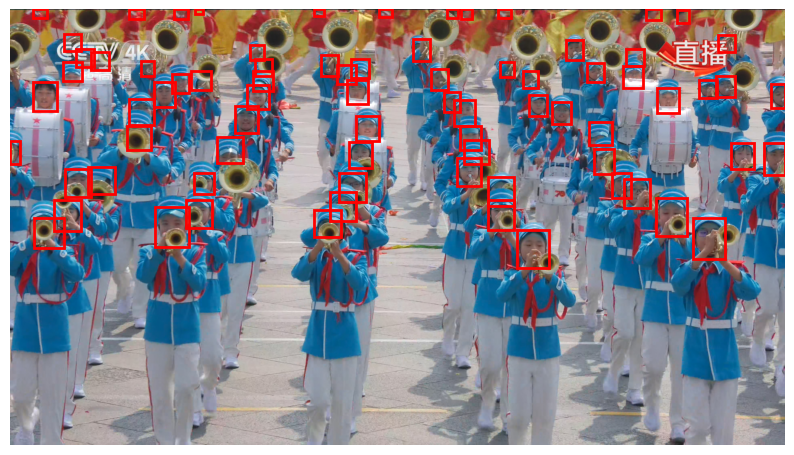

In [ ]:
import os
import scipy.io
import cv2
import matplotlib.pyplot as plt

# Paths
img_dir = "/home/stevenyang/Desktop/cmput469/YOLO/NWPU/img"
mat_dir = "/home/stevenyang/Desktop/cmput469/YOLO/NWPU/mats"

def plot_image(i):
    img_files = sorted(os.listdir(img_dir))
    if i < 0 or i >= len(img_files):
        print("Index out of range.")
        return

    img_file = img_files[i]
    img_path = os.path.join(img_dir, img_file)
    mat_path = os.path.join(mat_dir, img_file.replace(".jpg", ".mat"))

    if not os.path.exists(mat_path):
        print(f"Annotation file {mat_path} not found.")
        return

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    mat_data = scipy.io.loadmat(mat_path)
    ann_boxes = mat_data['annBoxes']

    plt.figure(figsize=(10, 6))
    plt.imshow(img)

    for box in ann_boxes:
        x_min, y_min, x_max, y_max = box
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='red', linewidth=2, fill=False))

    plt.axis("off")
    plt.show()

# Example usage:
plot_image(530)  # Change the index to plot a different image
